<a href="https://colab.research.google.com/github/vicente-gonzalez-ruiz/linear_regression/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Linear regression](https://colab.research.google.com/github/google/eng-edu/blob/master/ml/cc/exercises/linear_regression_with_a_real_dataset.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=linear_regression_real_tf2-colab&hl=en#scrollTo=JZlvdpyYKx7V)

## Synthetic dataset

In [0]:
%tensorflow_version 2.x
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [0]:
# Dataset definition
features = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
labels = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

In [0]:
# Define a sequential model with tf.keras
model = tf.keras.models.Sequential()

In [0]:
# Structure (also called the topography) of the model (a single neuron, that is, a single node in a single layer)
model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

In [0]:
# Configure and compile the model
learning_rate = 0.14
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [6]:
# Train the model
epochs = 70
batch_size = 12
history = model.fit(x=features, y=labels, batch_size=batch_size, epochs=epochs)

Epoch 1/70
1/1 [==============================] - 0s 1ms/step - loss: 795.9138 - root_mean_squared_error: 28.2119
Epoch 2/70
1/1 [==============================] - 0s 986us/step - loss: 603.1895 - root_mean_squared_error: 24.5599
Epoch 3/70
1/1 [==============================] - 0s 1ms/step - loss: 488.0410 - root_mean_squared_error: 22.0917
Epoch 4/70
1/1 [==============================] - 0s 1ms/step - loss: 404.9019 - root_mean_squared_error: 20.1222
Epoch 5/70
1/1 [==============================] - 0s 916us/step - loss: 340.1791 - root_mean_squared_error: 18.4439
Epoch 6/70
1/1 [==============================] - 0s 1ms/step - loss: 287.7422 - root_mean_squared_error: 16.9630
Epoch 7/70
1/1 [==============================] - 0s 817us/step - loss: 244.2284 - root_mean_squared_error: 15.6278
Epoch 8/70
1/1 [==============================] - 0s 896us/step - loss: 207.5624 - root_mean_squared_error: 14.4070
Epoch 9/70
1/1 [==============================] - 0s 902us/step - loss: 176.3568

In [7]:
# Get parameters of the training (remember that a lineal model only have a bias and a weight)
weight = model.get_weights()[0]
bias = model.get_weights()[1]
completed_epochs = history.epoch
history_per_epoch = pd.DataFrame(history.history)
print(history_per_epoch)
rmse = history_per_epoch["root_mean_squared_error"]

          loss  root_mean_squared_error
0   795.913757                28.211943
1   603.189453                24.559916
2   488.041046                22.091652
3   404.901947                20.122175
4   340.179108                18.443945
..         ...                      ...
65    0.986659                 0.993307
66    0.979650                 0.989773
67    0.972741                 0.986277
68    0.965954                 0.982830
69    0.959313                 0.979445

[70 rows x 2 columns]


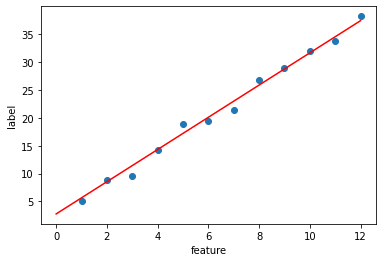

In [8]:
# Plot the regression model
def plot_model():
  plt.xlabel("feature")
  plt.ylabel("label")
  plt.scatter(features, labels)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = bias
  x1 = features[-1]
  y1 = bias + weight*x1

  plt.plot([x0, x1], [y0, y1], c='r')
  plt.show()
plot_model()

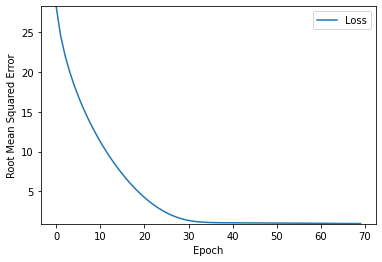

In [9]:
# Plot the loss curve (loss vs epoch)
def plot_loss():
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(completed_epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()
plot_loss()

Epoch 1/125
12/12 [==============================] - 0s 1ms/step - loss: 50.6541 - root_mean_squared_error: 7.1172
Epoch 2/125
12/12 [==============================] - 0s 991us/step - loss: 1.7313 - root_mean_squared_error: 1.3158
Epoch 3/125
12/12 [==============================] - 0s 930us/step - loss: 0.9459 - root_mean_squared_error: 0.9726
Epoch 4/125
12/12 [==============================] - 0s 1ms/step - loss: 1.4117 - root_mean_squared_error: 1.1882
Epoch 5/125
12/12 [==============================] - 0s 954us/step - loss: 1.2578 - root_mean_squared_error: 1.1215
Epoch 6/125
12/12 [==============================] - 0s 999us/step - loss: 2.1565 - root_mean_squared_error: 1.4685
Epoch 7/125
12/12 [==============================] - 0s 996us/step - loss: 1.5042 - root_mean_squared_error: 1.2265
Epoch 8/125
12/12 [==============================] - 0s 1ms/step - loss: 1.2493 - root_mean_squared_error: 1.1177
Epoch 9/125
12/12 [==============================] - 0s 1ms/step - loss: 2.14

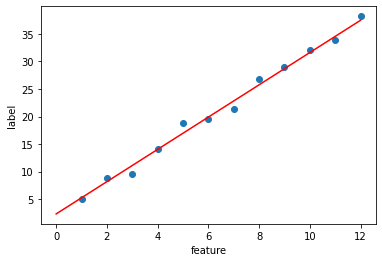

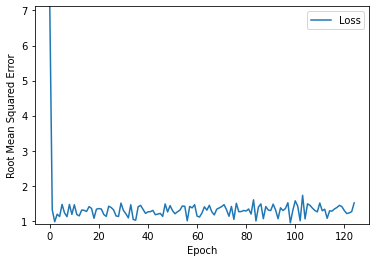

In [10]:
# Impact of the batch size
epochs = 125
batch_size = 1
learning_rate = 0.14
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate), loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(x=features, y=labels, batch_size=batch_size, epochs=epochs)
weight = model.get_weights()[0]
bias = model.get_weights()[1]
completed_epochs = history.epoch
history_per_epoch = pd.DataFrame(history.history)
rmse = history_per_epoch["root_mean_squared_error"]
plot_model()
plot_loss()

Epoch 1/125
12/12 [==============================] - 0s 1ms/step - loss: 55.8920 - root_mean_squared_error: 7.4761
Epoch 2/125
12/12 [==============================] - 0s 1ms/step - loss: 13.7255 - root_mean_squared_error: 3.7048
Epoch 3/125
12/12 [==============================] - 0s 1ms/step - loss: 3.1746 - root_mean_squared_error: 1.7817
Epoch 4/125
12/12 [==============================] - 0s 1ms/step - loss: 1.2038 - root_mean_squared_error: 1.0972
Epoch 5/125
12/12 [==============================] - 0s 1ms/step - loss: 1.1252 - root_mean_squared_error: 1.0607
Epoch 6/125
12/12 [==============================] - 0s 948us/step - loss: 1.1626 - root_mean_squared_error: 1.0782
Epoch 7/125
12/12 [==============================] - 0s 996us/step - loss: 1.3156 - root_mean_squared_error: 1.1470
Epoch 8/125
12/12 [==============================] - 0s 1ms/step - loss: 1.1453 - root_mean_squared_error: 1.0702
Epoch 9/125
12/12 [==============================] - 0s 1ms/step - loss: 0.8745 - 

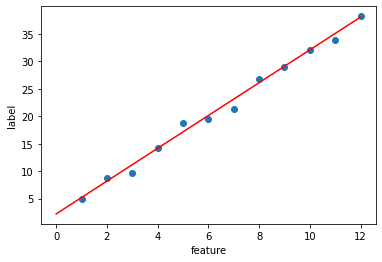

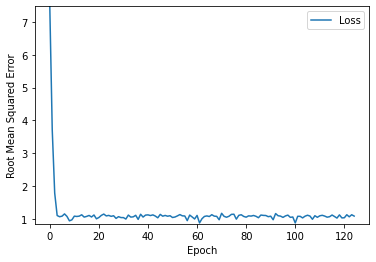

In [11]:
# Impact of the learning rate
epochs = 125
batch_size = 1
learning_rate = 0.05
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate), loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(x=features, y=labels, batch_size=batch_size, epochs=epochs)
weight = model.get_weights()[0]
bias = model.get_weights()[1]
completed_epochs = history.epoch
history_per_epoch = pd.DataFrame(history.history)
rmse = history_per_epoch["root_mean_squared_error"]
plot_model()
plot_loss()

## Real dataset

In [0]:
# adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [13]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [14]:
# Get statistics on the dataset.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [0]:
# Lets create a model that predicts house value based  solely on total_rooms
my_feature = "total_rooms"
my_label = "median_house_value"

In [0]:
def plot_model():
  plt.xlabel(features)
  plt.ylabel(labels)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[my_feature], random_examples[my_label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = bias
  x1 = 10000
  y1 = bias + weight*x1
  plt.plot([x0, x1], [y0, y1], c='r')

  plt.show()

def plot_loss():
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(completed_epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

Epoch 1/24
567/567 [==============================] - 1s 900us/step - loss: 202569.9844 - root_mean_squared_error: 450.0778
Epoch 2/24
567/567 [==============================] - 0s 881us/step - loss: 37555.9258 - root_mean_squared_error: 193.7935
Epoch 3/24
567/567 [==============================] - 0s 877us/step - loss: 33486.3984 - root_mean_squared_error: 182.9929
Epoch 4/24
567/567 [==============================] - 1s 907us/step - loss: 32794.4648 - root_mean_squared_error: 181.0924
Epoch 5/24
567/567 [==============================] - 1s 900us/step - loss: 29995.6465 - root_mean_squared_error: 173.1925
Epoch 6/24
567/567 [==============================] - 1s 912us/step - loss: 28273.8438 - root_mean_squared_error: 168.1483
Epoch 7/24
567/567 [==============================] - 1s 891us/step - loss: 27962.7285 - root_mean_squared_error: 167.2206
Epoch 8/24
567/567 [==============================] - 1s 934us/step - loss: 27016.4434 - root_mean_squared_error: 164.3668
Epoch 9/24
567/

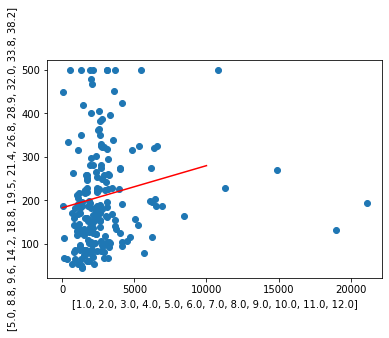

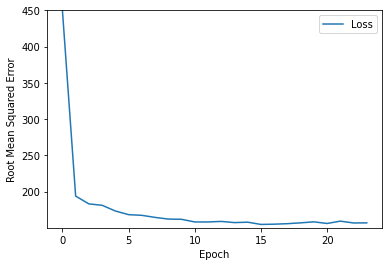

In [19]:
epochs = 24
batch_size = 30
learning_rate = 0.06
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate), loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(x=training_df[my_feature], y=training_df[my_label], batch_size=batch_size, epochs=epochs)
weight = model.get_weights()[0]
bias = model.get_weights()[1]
completed_epochs = history.epoch
history_per_epoch = pd.DataFrame(history.history)
rmse = history_per_epoch["root_mean_squared_error"]
plot_model()
plot_loss()

In [20]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             202
 3400     92             216
 3677     69             218
 2202     62             204
 2403     80             206
 5652    295             238
 3318    500             215
 2552    342             208
 1364    118             196
 3468    128             216


In [0]:
# Lets create a model that predicts house value based the "rooms_per_person" = "ratio total_rooms" / "population"
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"

Epoch 1/24
567/567 [==============================] - 1s 886us/step - loss: 40750.0508 - root_mean_squared_error: 201.8664
Epoch 2/24
567/567 [==============================] - 1s 942us/step - loss: 37763.6914 - root_mean_squared_error: 194.3288
Epoch 3/24
567/567 [==============================] - 1s 905us/step - loss: 33678.1289 - root_mean_squared_error: 183.5160
Epoch 4/24
567/567 [==============================] - 1s 907us/step - loss: 31661.0664 - root_mean_squared_error: 177.9356
Epoch 5/24
567/567 [==============================] - 1s 889us/step - loss: 30380.5176 - root_mean_squared_error: 174.3001
Epoch 6/24
567/567 [==============================] - 1s 916us/step - loss: 29522.5547 - root_mean_squared_error: 171.8213
Epoch 7/24
567/567 [==============================] - 1s 887us/step - loss: 28209.3848 - root_mean_squared_error: 167.9565
Epoch 8/24
567/567 [==============================] - 1s 904us/step - loss: 27579.3418 - root_mean_squared_error: 166.0703
Epoch 9/24
567/5

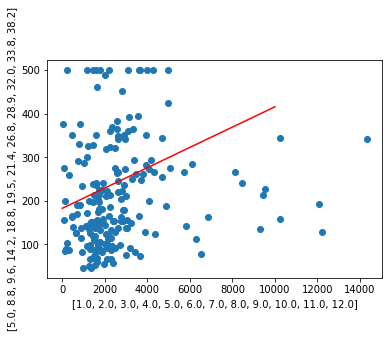

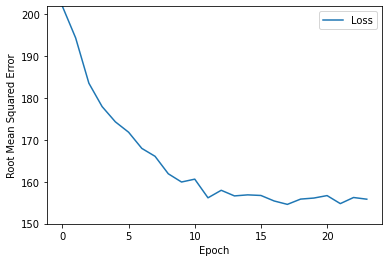

In [21]:
epochs = 24
batch_size = 30
learning_rate = 0.06
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate), loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(x=training_df[my_feature], y=training_df[my_label], batch_size=batch_size, epochs=epochs)
weight = model.get_weights()[0]
bias = model.get_weights()[1]
completed_epochs = history.epoch
history_per_epoch = pd.DataFrame(history.history)
rmse = history_per_epoch["root_mean_squared_error"]
plot_model()
plot_loss()

In [22]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             228
 3400     92             262
 3677     69             268
 2202     62             234
 2403     80             239
 5652    295             314
 3318    500             260
 2552    342             242
 1364    118             215
 3468    128             263


In [23]:
# Find feature(s) whose raw values correlate with the label
# Let's see the correlation matrix
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


In [0]:
# Lets create a model that predicts house value based  solely on total_rooms
my_feature = "median_income" # Correlates 0.7 with "median_house_value" (negative values are also OK) 
my_label = "median_house_value"

Epoch 1/24
567/567 [==============================] - 1s 918us/step - loss: 28825.7129 - root_mean_squared_error: 169.7814
Epoch 2/24
567/567 [==============================] - 1s 926us/step - loss: 7389.4038 - root_mean_squared_error: 85.9616
Epoch 3/24
567/567 [==============================] - 1s 918us/step - loss: 7014.2104 - root_mean_squared_error: 83.7509
Epoch 4/24
567/567 [==============================] - 1s 901us/step - loss: 7016.2573 - root_mean_squared_error: 83.7631
Epoch 5/24
567/567 [==============================] - 1s 906us/step - loss: 7014.8613 - root_mean_squared_error: 83.7548
Epoch 6/24
567/567 [==============================] - 1s 908us/step - loss: 7016.7827 - root_mean_squared_error: 83.7662
Epoch 7/24
567/567 [==============================] - 1s 885us/step - loss: 7015.9858 - root_mean_squared_error: 83.7615
Epoch 8/24
567/567 [==============================] - 1s 900us/step - loss: 7015.8481 - root_mean_squared_error: 83.7607
Epoch 9/24
567/567 [==========

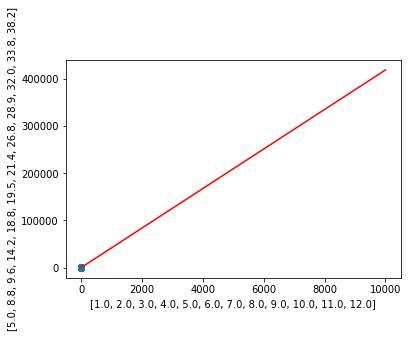

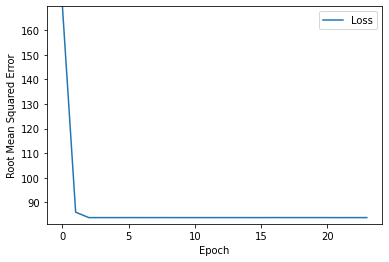

In [25]:
epochs = 24
batch_size = 30
learning_rate = 0.06
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate), loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(x=training_df[my_feature], y=training_df[my_label], batch_size=batch_size, epochs=epochs)
weight = model.get_weights()[0]
bias = model.get_weights()[1]
completed_epochs = history.epoch
history_per_epoch = pd.DataFrame(history.history)
rmse = history_per_epoch["root_mean_squared_error"]
plot_model()
plot_loss()

In [26]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             133
    4     92             210
    3     69             152
    2     62             131
    3     80             152
    2    295             146
   10    500             452
    5    342             257
    2    118             145
    4    128             219
